In [12]:
import os
import math
import time
from marvin import config

from marvin.tools.image import Image
from marvin.tools import Maps
from marvin.tools import Cube
import marvin.utils.plot.map as mapplot

import numpy as np

import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.stats import sigma_clipped_stats
from astropy.wcs import WCS
from astropy.io import fits

with fits.open('./data/galaxies_sorted.fits') as hdulist:
    plateifu_list = hdulist[1].data['plateifu']
    ra = hdulist[1].data['RA']
    dec = hdulist[1].data['Dec']
    z_list = hdulist[1].data['z']

mapnames = 'maps.emline_gflux_ha_6564'
errormap = ''

lofar_file_path = './data/lofar_imgs/'
lofar_list = os.listdir(lofar_file_path)

with fits.open('./data/angles.fits') as hdulist:
    angle_list = hdulist[1].data['col2']

angle_list[0] = -160
angle_list[11] = 110
angle_list[10] = 125
angle_list[12] = -70
angle_list[13] = -140

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

In [13]:
#sample = 5

def gen_dir_image(sample): #make direction image
    fig = plt.figure(figsize=(5,5))

    with fits.open(lofar_file_path+lofar_list[21]) as hdulofar:
        lofarim = hdulofar[0].data
        lofarwcs = WCS(hdulofar[0].header)

    size = np.shape(lofarim)[0]*1.5
    #size = 150
    im = Image(plateifu=plateifu_list[sample])
    im.get_new_cutout(size,size)

    ax = fig.add_axes([0,0,1,1], projection = im.wcs)
    ax.imshow(im.data)

    im.overlay_hexagon(ax, color='cyan', linewidth=0.75, transform=ax.get_transform(im.wcs))

    m,md,sd = sigma_clipped_stats(lofarim)

    ax.contour(lofarim, transform=ax.get_transform(lofarwcs), levels = [m+3*sd,m+4*sd,m+6*sd,m+16*sd,m+32*sd], colors='grey')
    
    ax.axis('off')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    fig.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    ax.margins(0,0)
    
    xc = (ax.get_xlim()[0]+ax.get_xlim()[1])/2
    yc = (ax.get_ylim()[0]+ax.get_ylim()[1])/2
    
    u = math.cos(math.radians(angle_list[sample]))
    v = math.sin(math.radians(angle_list[sample]))
    
    ax.quiver(xc,yc,u,v,color='y',units='inches',scale = 0.6)
    
    #fig.savefig('/mnt/c/Users/firel/Desktop/di/'+str(sample)+'_'+plateifu_list[sample]+'.jpg', format='jpg', dpi=100, pad_inches = 0)
    print(xc)
    print(ax.get_xbound())

In [14]:
for i in range(23):
    gen_dir_image(i)

KeyboardInterrupt: 

<Figure size 360x360 with 0 Axes>

321.5
(-0.5, 643.5)


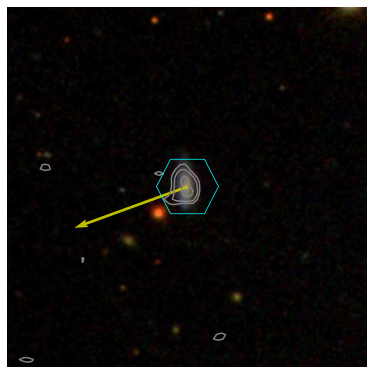

In [15]:
gen_dir_image(0)

In [5]:
lofar_list[21]

'147.72123_34.65490.fits'